[Python Package Use &lt;](6_Packages.ipynb) | [&gt; ML Model Use](8_Models.ipynb)

# What ML/DL frameworks are people using and what is their growth?

## Results Summary:
- The most frequent framework imported is sklearn. Much less frequently imported are tensorflow and keras. Theano, mxnet, caffe, cntk, and pytorch are used extremely rarely.
- Over time, Sklearn has consistently been in the lead, though it did have a small dip in popularity in 2014 and 2015. Conversely, the popularity of tensorflow grew during these years (though never to the level of Sklearn). Popularities have stayed stable since 2016, with sklearn being used in approximately 24% of notebooks, both tensorflow and keras used in 6-8% of notebooks, and torch around 2%. Theano and mxnet hover around 1%. Caffee, cntk, and pytorch are very close to 0%.
- While Sklearn is the most frequent framework in Jupyter Notebooks, Tensorflow is the most frequent across all of GitHub.
- Theano and Keras tend to be imported into the same notebooks, though both are very infrequent.
- Model selection and Metrics are the most frequently imported modules from scikit learn. Model selection is most frequently used for train test split, cross validation score, and grid search with cross validation. Metrics is frequently used for accuracy score, confusion matrix, classification report, mse, f1, and area under the roc curve.
- The most frequent imports from Keras are 'Models' and 'Layers'. Further, 'Sequential' is by far the most frequent import from keras.models and 'Dense' is the most frequent import from keras.layers.
--------

# Import Packages & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st

import load_data
import datetime
import pickle


In [2]:
notebooks_temp = load_data.load_notebooks()
repos_temp = load_data.load_repos()
nb_imports_df_temp = load_data.load_nb_imports()
edu_status_df_temp = load_data.load_edu_status()

Notebooks loaded in 0:00:27.327023
Repos loaded in 0:00:04.749918
Notebook imports loaded in 0:00:40.469458
Educational status loaded in 0:00:00.005360


---
# Clean Data

### Only looking at Python notebooks

In [3]:
notebooks = notebooks_temp.copy()[notebooks_temp.lang_name == 'python'].reset_index(drop=True)

In [4]:
print("{0} ({1}%) of notebooks were written in Python. The remaining {2}% have been removed.".format(
    len(notebooks),
    round(100*len(notebooks)/len(notebooks_temp), 2),
    round(100 - 100*len(notebooks)/len(notebooks_temp), 2)
))

4403851 (95.95%) of notebooks were written in Python. The remaining 4.05% have been removed.


### Update repos and aggregated dataframe to reflect notebooks in question

In [5]:
repos = repos_temp.copy()[repos_temp.repo_id.isin(notebooks.repo_id)].reset_index(drop=True)
nb_imports_df = nb_imports_df_temp.copy()[nb_imports_df_temp.file.isin(notebooks.file)].reset_index(drop=True)
edu_status_df = edu_status_df_temp.copy()[edu_status_df_temp.repo_id.isin(notebooks.repo_id)].reset_index(drop=True)

### Delete temp dataframes to save space

In [6]:
del notebooks_temp
del repos_temp
del nb_imports_df_temp
del edu_status_df_temp

---
# Manipulate Data

### Framework popularities

In [7]:
frameworks = ['tensorflow', 'sklearn', 
              'keras', 'theano', 'mxnet', 
              'caffe', 'pytorch', 'cntk', 'torch']

In [8]:
# 17 seconds
start = datetime.datetime.now()

all_imports = []
for im in nb_imports_df.imports:
    all_imports += list(set([i[0].split('.')[0] for i in im]))
    
end = datetime.datetime.now()
print(end - start) 

0:00:19.162224


In [9]:
# 5 seconds
start = datetime.datetime.now()

framework_imports = pd.Series(all_imports)[
    pd.Series(all_imports).isin(frameworks)
]
framework_counts = framework_imports.value_counts().reset_index().rename(columns={'index':'Framework',0:'count'})
framework_counts['prop'] = framework_counts['count']/len(nb_imports_df)

end = datetime.datetime.now()
print(end - start)


0:00:03.285432


In [10]:
framework_counts

,Framework,count,prop
0,sklearn,991108,0.240845
1,tensorflow,335695,0.081576
2,keras,242979,0.059045
3,torch,116881,0.028403
4,theano,16224,0.003943
5,caffe,15671,0.003808
6,mxnet,11634,0.002827
7,cntk,1821,0.000443
8,pytorch,42,0.000010


### File type counts

In [11]:
keras_py = 862021
keras_sklearn_py = 132202 # intersection
sklearn_py = 3646592
sklearn_tensorflow_py = 93708
tensorflow_py = 4380925
keras_tensorflow_py = 434546
all_3_py = 40297
total_py = (keras_py + sklearn_py + tensorflow_py 
         - keras_sklearn_py - sklearn_tensorflow_py 
         - keras_tensorflow_py + all_3_py)

keras = 1888994
keras_sklearn = 294621 # intersection
sklearn = 3646592
sklearn_tensorflow = 350666
tensorflow = 10719995
keras_tensorflow = 1053802
all_3 = 157605
total = (keras + sklearn + tensorflow 
         - keras_sklearn - sklearn_tensorflow 
         - keras_tensorflow + all_3)

keras_j = 292944
keras_sklearn_j = 124906
sklearn_j = 1042019
sklearn_tensorflow_j = 155455
tensorflow_j = 538060
keras_tensorflow_j = 241067
all_3_j = 93794
total_j = (keras_j + sklearn_j + tensorflow_j
           - keras_sklearn_j - sklearn_tensorflow_j
           -keras_tensorflow_j + all_3_j)

all_files = {
    'keras': keras ,
    'sklearn': sklearn,
    'tensorflow': tensorflow
}

jupyter = {
    'keras': keras_j,
    'sklearn': sklearn_j,
    'tensorflow': tensorflow_j
}

python = {
    'keras': keras_py,
    'sklearn': sklearn_py,
    'tensorflow': tensorflow_py
}

framework_filetype_counts = pd.DataFrame([all_files, jupyter, python])
framework_filetype_counts.index = ['all','jupyter','python']

---
# Visualizations and Statistics

## Framework counts

In [12]:
print("SkLearn is used in {0}% of notebooks. Keras in {1}%, TensorFlow in {2}%, and Torch in {3}%.".format(
    round(100*framework_counts[framework_counts.Framework == 'sklearn'].prop.values[0], 3),
    round(100*framework_counts[framework_counts.Framework == 'keras'].prop.values[0], 3),
    round(100*framework_counts[framework_counts.Framework == 'tensorflow'].prop.values[0], 3),
    round(100*framework_counts[framework_counts.Framework == 'torch'].prop.values[0], 3)

))


SkLearn is used in 24.085% of notebooks. Keras in 5.905%, TensorFlow in 8.158%, and Torch in 2.84%.


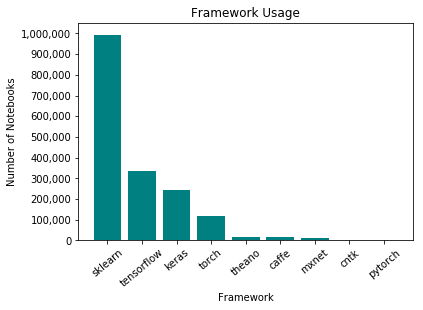

In [13]:
x = framework_counts['Framework']
x_pos = np.arange(len(x))
y = framework_counts['count']

plt.bar(x_pos, y, color = 'teal')
plt.xticks(x_pos, x, rotation = 40)
plt.title('Framework Usage')
plt.xlabel('Framework')
plt.ylabel('Number of Notebooks')
plt.ylim(0, 1050000)
plt.yticks(range(0, 1050000, 100000), ['{:,}'.format(i) for i in range(0, 1050000, 100000)])
plt.show()

The most frequent framework import is sklearn. Much less frequently imported are tensorflow and keras. Theano, mxnet, caffe, cntk, and pytorch are used extremely rarely. Lets take a closer look at these packages' growths in popularity over time.

### Is this everywhere, or just in Jupyter

On GitHub, a code search for 'keras' has 1,796,655 results, 'sklearn' has 3,530,545, and 'tensorflow' has 10,430,463.

For a code search with the 'Jupyter Notebook' language specification, 'keras' has 304,029  results, 'sklearn' has 982,596, and 'tensorflow' has 524,929.

Even though tensorflow is by far the most popular across all code files on github (surpasses sklearn by a factor of ~3), it is much less popular within Jupyter notebooks (sklearn is almost twice as popular).

&ast; Numbers collected from github search on Friday July 5th at 12:46pm

### Chi Squared Test for Independence
- $H_o$: machine learning framework use is independent of file type
- $H_a$: machine learning framework depends on file type

#### Compare to all files on GitHub

In [14]:
framework_filetype_counts.loc[['all','jupyter']]

,keras,sklearn,tensorflow
all,1888994,3646592,10719995
jupyter,292944,1042019,538060


In [15]:
chi2, p, dof, ex = st.chi2_contingency(framework_filetype_counts.loc[['all','jupyter']])

print("""At the 5% significance level, with a chi-squared statistic of 
{0} and a p-value of {1}, we reject the null hypotheis and conclude that proportions
of machine learning frameworks are different for Jupyter notebooks on github than they 
are for all code on github.""".format(
    round(chi2,2), 
    round(p,2),
))

At the 5% significance level, with a chi-squared statistic of 
1112981.23 and a p-value of 0.0, we reject the null hypotheis and conclude that proportions
of machine learning frameworks are different for Jupyter notebooks on github than they 
are for all code on github.


#### Compare just to Python

In [16]:
framework_filetype_counts.loc[['python','jupyter']]

,keras,sklearn,tensorflow
python,862021,3646592,4380925
jupyter,292944,1042019,538060


In [17]:
chi2, p, dof, ex = st.chi2_contingency(framework_filetype_counts.loc[['python','jupyter']])

print("""At the 5% significance level, with a chi-squared statistic of 
{0} and a p-value of {1}, we reject the null hypotheis and conclude that proportions
of machine learning frameworks are different for Jupyter notebooks on github than they 
are for python code on github.""".format(
    round(chi2,2), 
    round(p,2),
))

At the 5% significance level, with a chi-squared statistic of 
269755.28 and a p-value of 0.0, we reject the null hypotheis and conclude that proportions
of machine learning frameworks are different for Jupyter notebooks on github than they 
are for python code on github.


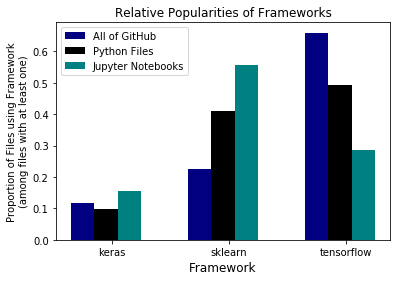

In [18]:
x = framework_filetype_counts.columns
x1_placement = np.arange(len(x))-0.2
height1 = framework_filetype_counts.loc['all'] / sum(framework_filetype_counts.loc['all'])
plt.bar(x1_placement, height1, width = 0.2, color = 'navy', label = 'All of GitHub')
plt.xticks(x1_placement+0.25, x)

x2_placement = np.arange(len(x))
height2 = framework_filetype_counts.loc['python'] / sum(framework_filetype_counts.loc['python'])
plt.bar(x2_placement, height2, width = 0.2, color = 'black', label = 'Python Files')

x3_placement = np.arange(len(x))+0.2
height3 = framework_filetype_counts.loc['jupyter'] / sum(framework_filetype_counts.loc['jupyter'])
plt.bar(x3_placement, height3, width = 0.2, color = 'teal', label = 'Jupyter Notebooks')


plt.legend()
plt.title('Relative Popularities of Frameworks', fontsize = 12)
plt.xlabel('Framework', fontsize = 12)
plt.ylabel('Proportion of Files using Framework\n(among files with at least one)')
plt.show()

## Educational Notebooks: SkLearn vs Tensorflow

In [19]:
nb_imports_df_with_repo = nb_imports_df.merge(
    notebooks[['file','repo_id']], on = 'file'
)

In [20]:
edu_nb_imports = nb_imports_df_with_repo[nb_imports_df_with_repo.repo_id.isin(
    edu_status_df[edu_status_df.edu == True].repo_id
)]

edu_total = sum([
    ('sklearn' in [i[0] for i in im] or 
     'tensorflow' in [i[0] for i in im] or 
     'keras' in [i[0] for i in im]
     ) for im in edu_nb_imports.imports
])
all_edu_imports = []
for im in edu_nb_imports.imports:
    all_edu_imports += im
    
non_edu_nb_imports = nb_imports_df_with_repo[nb_imports_df_with_repo.repo_id.isin(
    edu_status_df[edu_status_df.edu == False].repo_id
)]

non_edu_total = sum([
    ('sklearn' in [i[0] for i in im] or 
     'tensorflow' in [i[0] for i in im] or 
     'keras' in [i[0] for i in im]) for im in non_edu_nb_imports.imports
])
all_non_edu_imports = []
for im in non_edu_nb_imports.imports:
    all_non_edu_imports += im
    

In [21]:
del nb_imports_df_with_repo

In [22]:
edu_framework_imports = pd.Series([im[0] for im in all_edu_imports])[pd.Series([im[0] for im in all_edu_imports]).isin(frameworks)]
edu_framework_counts = edu_framework_imports.value_counts().reset_index().rename(columns={'index':'Framework',0:'count'})
edu_framework_counts = edu_framework_counts[edu_framework_counts.Framework.isin(['sklearn','tensorflow','keras'])]

non_edu_framework_imports = pd.Series([im[0] for im in all_non_edu_imports])[pd.Series([im[0] for im in all_non_edu_imports]).isin(frameworks)]
non_edu_framework_counts = non_edu_framework_imports.value_counts().reset_index().rename(columns={'index':'Framework',0:'count'})
non_edu_framework_counts = non_edu_framework_counts[non_edu_framework_counts.Framework.isin(['sklearn','tensorflow','keras'])]

In [23]:
edu_framework_counts['prop'] = edu_framework_counts['count']/edu_total
non_edu_framework_counts['prop'] = non_edu_framework_counts['count']/non_edu_total

print("Among educational notebooks using at least one of keras, tensorflow, and sklearn:")
print("SkLearn is used in {0}% of notebooks. Keras in {1}% and TensorFlow in {2}%.".format(
    round(100*edu_framework_counts[edu_framework_counts.Framework == 'sklearn'].prop.values[0], 3),
    round(100*edu_framework_counts[edu_framework_counts.Framework == 'keras'].prop.values[0], 3),
    round(100*edu_framework_counts[edu_framework_counts.Framework == 'tensorflow'].prop.values[0], 3)
))
print("\nAmong non-educational notebooks using at least one of keras, tensorflow, and sklearn:")
print("SkLearn is used in {0}% of notebooks. Keras in {1}% and TensorFlow in {2}%.".format(
    round(100*non_edu_framework_counts[non_edu_framework_counts.Framework == 'sklearn'].prop.values[0], 3),
    round(100*non_edu_framework_counts[non_edu_framework_counts.Framework == 'keras'].prop.values[0], 3),
    round(100*non_edu_framework_counts[non_edu_framework_counts.Framework == 'tensorflow'].prop.values[0], 3)
))


Among educational notebooks using at least one of keras, tensorflow, and sklearn:
SkLearn is used in 17.887% of notebooks. Keras in 16.303% and TensorFlow in 85.498%.

Among non-educational notebooks using at least one of keras, tensorflow, and sklearn:
SkLearn is used in 17.83% of notebooks. Keras in 21.904% and TensorFlow in 85.241%.


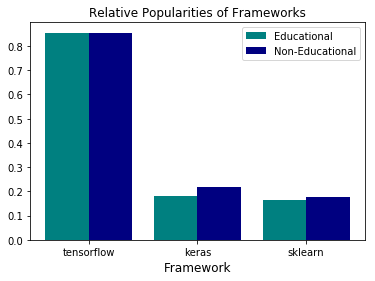

In [24]:
x = edu_framework_counts.Framework
x_pos = np.arange(len(x)) - 0.2
height = edu_framework_counts.prop
plt.bar(x_pos, height, color = 'teal', width = 0.4, label = 'Educational')

x = non_edu_framework_counts.Framework
x_pos = np.arange(len(x)) + 0.2
height = non_edu_framework_counts.prop
plt.bar(x_pos, height, color = 'navy', width = 0.4, label = 'Non-Educational')

ticks_pos = np.arange(len(x))
plt.xticks(ticks_pos, x)

plt.legend()
plt.title('Relative Popularities of Frameworks', fontsize = 12)
plt.xlabel('Framework', fontsize = 12)
plt.show()


## Use of frameworks over time

In [25]:
# 1 minute
DATE_CHOICE = 'pushed_at'
start = datetime.datetime.now()

imports_by_year = nb_imports_df.merge(notebooks, on = 'file').merge(repos, on = 'repo_id')[['imports','file',DATE_CHOICE]]
imports_by_year[DATE_CHOICE] = pd.to_datetime(imports_by_year[DATE_CHOICE])
imports_by_year['year'] = [c.year for c in imports_by_year[DATE_CHOICE]]
imports_by_year['month'] = [c.month for c in imports_by_year[DATE_CHOICE]]

end = datetime.datetime.now()
print(end - start)


0:01:06.197688


In [26]:
# 1 minute
start = datetime.datetime.now()

for column in frameworks:
    imports_by_year[column] = [0]*len(imports_by_year)
    imports_by_year.loc[[column in ' '.join([i[0] for i in im]) for im in imports_by_year['imports']],column] = 1
yearly_counts = imports_by_year.groupby(['year'])[frameworks].sum().reset_index()
yearly_counts['total'] = imports_by_year.groupby('year')[DATE_CHOICE].count().values
yearly_counts_long = pd.melt(yearly_counts, id_vars =['year'], value_vars =frameworks)


yearly_props = pd.DataFrame({'year':yearly_counts['year']})
for column in frameworks:
    yearly_props[column] = yearly_counts[column] / yearly_counts['total']
    
yearly_props_long = pd.melt(yearly_props, id_vars =['year'], value_vars = frameworks) 


end = datetime.datetime.now()
print(end - start)


0:01:22.921265


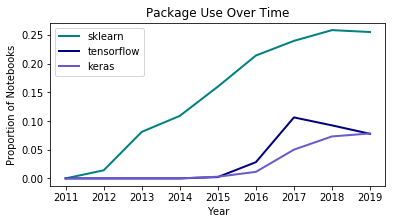

In [27]:
fig = plt.figure(figsize = (6,3))

x = yearly_props['year']
# for col in yearly_props_long.variable.unique():
colors = {
    'tensorflow': 'navy',
    'sklearn': 'teal',
    'keras': 'slateblue'
}
for col in ['sklearn','tensorflow','keras']:
    y = yearly_props[col]
    plt.plot(x, y, linewidth = 2, label = col, color = colors[col])
    
plt.title('Package Use Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Notebooks')
plt.legend()
plt.show()

Scikitlearn has grown steadily in popularity since 2012, now with over 20% of all notebooks on GitHub using it. Tensorflow peaked in popularity in 2017, with around 10% of notebooks using it, but since have decreased slightly in popularity. Theano and Mxnet are not very popular. Caffee, cntk, and pytorch are very close to 0%.

## What frameworks are frequently used together -- in a notebook?

In [28]:
# 3 minutes
start = datetime.datetime.now()
for f in frameworks:
    nb_imports_df[f] = [f in ' '.join([i[0] for i in im]) for im in nb_imports_df.imports]
    print(f, datetime.datetime.now() - start)
end = datetime.datetime.now()
print(end - start)


tensorflow 0:00:07.012575
sklearn 0:00:14.009658
keras 0:00:21.076233
theano 0:00:28.188071
mxnet 0:00:35.313456
caffe 0:00:42.322685
pytorch 0:00:49.285241
cntk 0:00:56.257067
torch 0:01:03.279995
0:01:03.280342


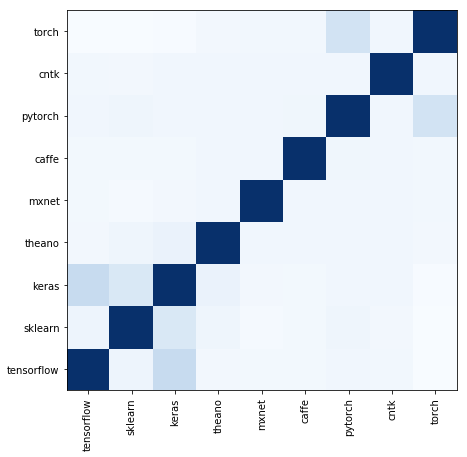

In [29]:
df = nb_imports_df[frameworks].corr().transpose()
fig = plt.figure(figsize = (7,7))
plt.pcolor(df, cmap = 'Blues')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation = 90)
plt.show()


In [30]:
t = len(nb_imports_df[nb_imports_df['theano'] == True])
k = len(nb_imports_df[nb_imports_df['keras'] == True])
tk = len(nb_imports_df[np.logical_and(nb_imports_df['theano'] == True, nb_imports_df['keras'] == True)])
print("There are only {0:,} notebooks that use theano and only {1:,} that use keras. {2:,} notebooks use both.".format(t,k,tk))

There are only 16,383 notebooks that use theano and only 267,558 that use keras. 2,964 notebooks use both.


It looks like people usually use one framework or the other and rarely import both into the same notebook. The most likely to be imported together are theano and keras. Of the 14,299 notebooks that use theano, 2,472 (17%) also use keras. 

## What frameworks are frequently used together -- by the same user?
The correlations for framework use by user look almost exactly the same as by notebook. It is possible that with more data, this will change. 

In [31]:
# 9 seconds
start = datetime.datetime.now()

nb_imports_owners_df = nb_imports_df.merge(notebooks[['file','owner_id']], on = 'file')

end = datetime.datetime.now()
print(end - start)


0:00:06.714918


In [32]:
# 1 min
def atleast_once(nums):
    if sum(nums) > 0:
        return 1
    else:
        return 0

start = datetime.datetime.now()

frameworks_user_counts = nb_imports_owners_df.groupby('owner_id')[frameworks].aggregate(
    atleast_once
).reset_index()

end = datetime.datetime.now()
print(end - start)


0:01:09.807100


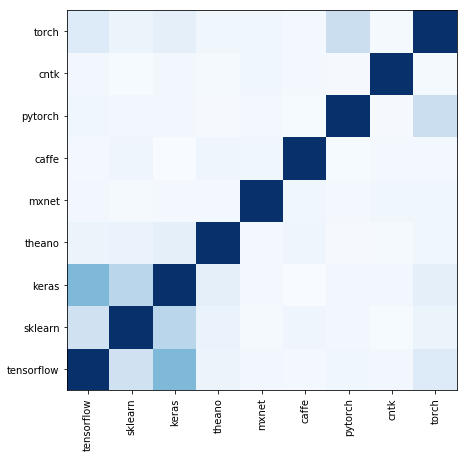

In [33]:
df = frameworks_user_counts[frameworks].corr().transpose()
fig = plt.figure(figsize = (7,7))
plt.pcolor(df, cmap = 'Blues')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation = 90)
plt.show()


In [34]:
t = len(frameworks_user_counts[frameworks_user_counts['theano'] == True])
k = len(frameworks_user_counts[frameworks_user_counts['keras'] == True])
tk = len(frameworks_user_counts[np.logical_and(frameworks_user_counts['theano'] == True, frameworks_user_counts['keras'] == True)])
print("There are only {0} users that use theano and {1} that use keras. {2} users use both.".format(t,k,tk))

There are only 4502 users that use theano and 68579 that use keras. 2274 users use both.


## Closer look at sklearn
Scikit Learn is the most popular machine learning framework imported into jupyter notebooks. Here, we look more specifically at what people are using sklearn for, and how those uses have changed over time.

In [35]:
# 4 minutes
start = datetime.datetime.now()
sk_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('sklearn')]
                ) for import_list in nb_imports_df[nb_imports_df['sklearn']==True]['imports']])
end = datetime.datetime.now()
print(end - start)

0:02:58.113534


In [36]:
# 14 seconds
start = datetime.datetime.now()

sk_mods = pd.Series([m for m in sk_modules if m.startswith('sklearn.')])
sk_major_mods = pd.Series([m.split('.')[1] if '.' in m else '' for m in sk_mods]).value_counts()
sk_all_mods = pd.Series(['.'.join(m.split('.')[1:]) for m in sk_mods]).value_counts()

end = datetime.datetime.now()
print(end - start)

0:00:11.446697


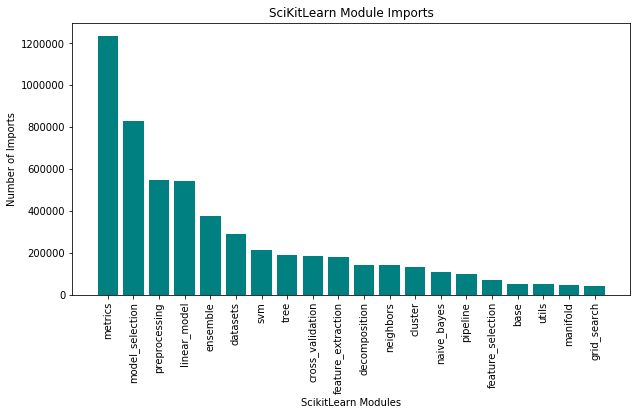

In [37]:
labels = sk_major_mods.index[:20]
pos = np.arange(len(labels))
height = sk_major_mods.values[:20]
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn Module Imports')
plt.xlabel('ScikitLearn Modules')
plt.ylabel('Number of Imports')
plt.show()

Model selection and Metrics are the most frequently imported modules from scikit learn.

### Sklearn.Metrics


In [38]:
# 4 seconds
start = datetime.datetime.now()

metrics_modules = sk_mods[[
    m.startswith('sklearn.metrics.') for m in sk_mods
]]
metrics_modules = ['.'.join(m.split('.')[2:]) for m in metrics_modules]
metrics_uses = pd.Series(metrics_modules).value_counts()

end = datetime.datetime.now()
print(end - start)

0:00:03.084184


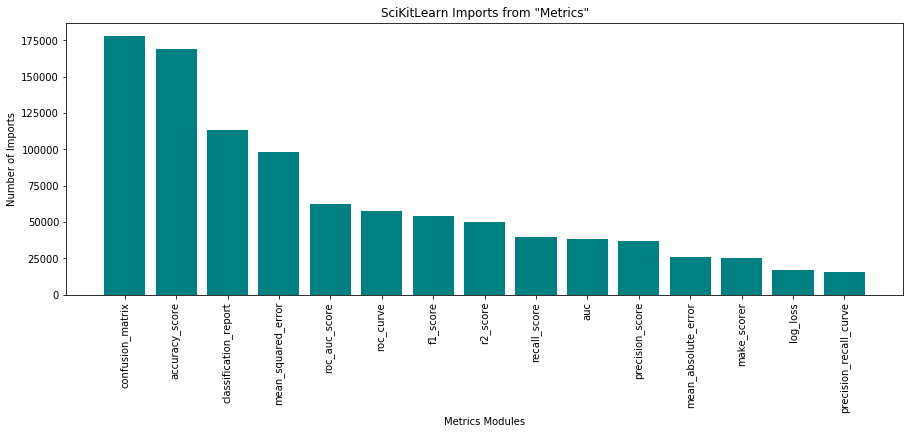

In [39]:
labels = metrics_uses[:15].index
pos = np.arange(len(labels))
height = metrics_uses[:15].values
fig = plt.figure(figsize=(15,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn Imports from "Metrics"')
plt.xlabel('Metrics Modules')
plt.ylabel('Number of Imports')
plt.show()

Accuracy score, confusion matrix, classification report, mse, f1, and area under the roc curve are the most commonly used metrics from skelarn.

### Sklearn.model_selection

In [40]:
model_selection_modules = sk_mods[[m.startswith('sklearn.model_selection.') for m in sk_mods]]
model_selection_modules = ['.'.join(m.split('.')[2:]) for m in model_selection_modules]
uses = pd.Series(model_selection_modules).value_counts()

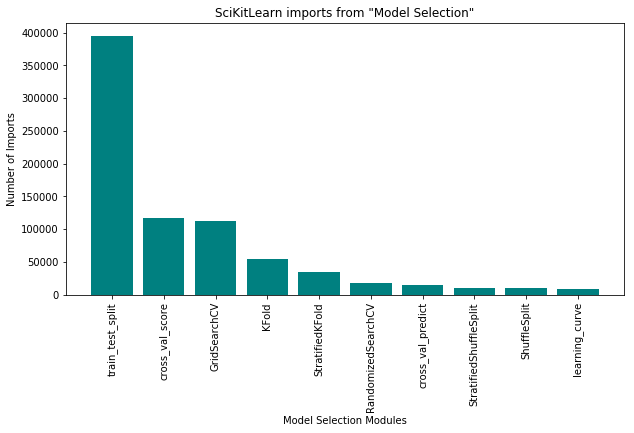

In [41]:
labels = uses.index[:10]
pos = np.arange(len(labels))
height = uses.values[:10]
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.title('SciKitLearn imports from "Model Selection"')
plt.xlabel('Model Selection Modules')
plt.ylabel('Number of Imports')
plt.show()

People almost alwasy use train test split from the model selection package of sklearn. The next most popular uses of model selection are cross validation score and grid search with cross validation.

## Closer look at Keras
Keras is for deep learning with neural networks. With keras, 'Sequential', from keras.models, is the holder for the models (model = Sequential()). The layers, from keras.layers, are then added with model.add--for example, model.add(Dense(...)). Dense is an example of a fully-connected layer, so multiple 'Dense' additions create a multilyaer perceptron. A convolutional nueral net can be created by adding Conv2D. Add LSTM for an artifical recurrent neural net. It may not be useful to look into what specific 'models' are used, since all models are some version of a neural net. The way that models are built with keras explains why the most frequent imports are 'Models' and 'Layers'. Further, it explains why 'Sequential' is by far the most frequent import from keras.models.

In [42]:
# 1 minute
start = datetime.datetime.now()

ks_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('keras')]
                ) for import_list in nb_imports_df[nb_imports_df['keras']==True]['imports']])

end = datetime.datetime.now()
print(end - start)

0:00:46.024658


In [43]:
keras_major_mods = [m.split('.')[1] for m in ks_modules if '.' in m ]
keras_major_mods_counts = pd.Series(keras_major_mods).value_counts()

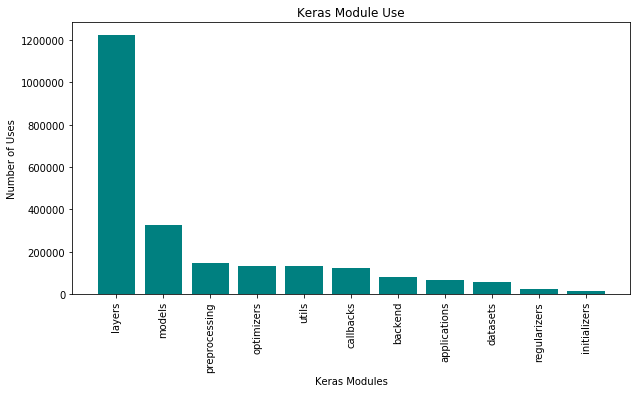

In [44]:
labels = keras_major_mods_counts[keras_major_mods_counts.values > 10000].index
pos = np.arange(len(labels))
height = keras_major_mods_counts[keras_major_mods_counts.values > 10000].values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras Modules')
plt.ylabel('Number of Uses')
plt.title('Keras Module Use')
plt.show()

### Keras.Layers

In [45]:
keras_layers_minor_mods = [mod.split('.')[1]
    for mod in ['' if '.' not in m else '.'.join(m.split('.')[1:]) for m in ks_modules]
    if mod.startswith('layers.')
]
keras_layers_minor_mods_counts = pd.Series(keras_layers_minor_mods).value_counts()
keras_layers_minor_mods_counts = keras_layers_minor_mods_counts[keras_layers_minor_mods_counts.values > 10000]

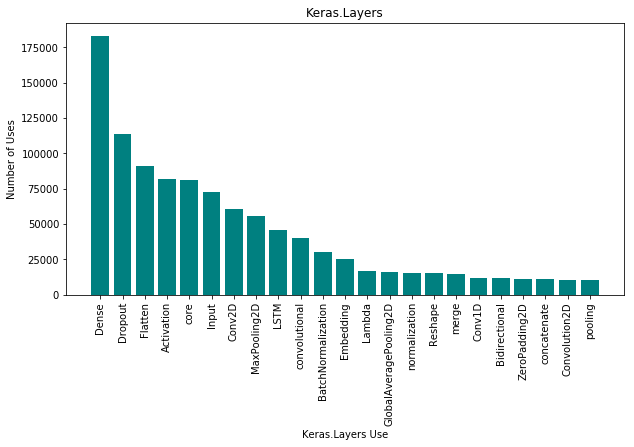

In [46]:
labels = keras_layers_minor_mods_counts.index
pos = np.arange(len(labels))
height = keras_layers_minor_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras.Layers Use')
plt.ylabel('Number of Uses')
plt.title('Keras.Layers')
plt.show()

### Keras.Models

In [47]:
keras_models_minor_mods = [mod.split('.')[1]
    for mod in ['' if '.' not in m else '.'.join(m.split('.')[1:]) for m in ks_modules]
    if mod.startswith('models.')
]
keras_models_minor_mods_counts = pd.Series(keras_models_minor_mods).value_counts()
keras_models_minor_mods_counts = keras_models_minor_mods_counts[keras_models_minor_mods_counts.values > 5000]

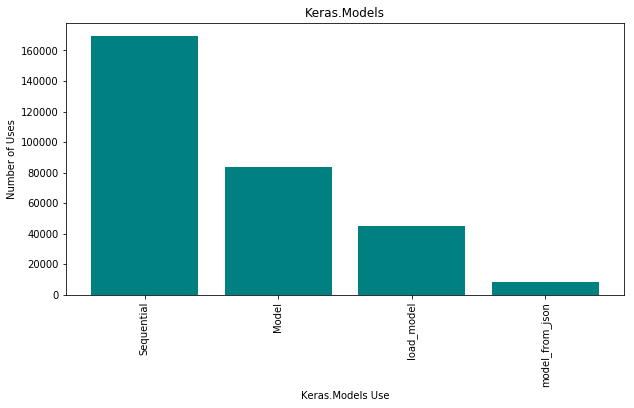

In [48]:
labels = keras_models_minor_mods_counts.index
pos = np.arange(len(labels))
height = keras_models_minor_mods_counts.values
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('Keras.Models Use')
plt.ylabel('Number of Uses')
plt.title('Keras.Models')
plt.show()

## Closer look at Tensorflow

In [49]:
# 1 minute
start = datetime.datetime.now()

tf_modules = pd.concat([pd.Series([import_object[0] 
                      for import_object in import_list 
                      if import_object[0].startswith('tensorflow')]
                ) for import_list in nb_imports_df[nb_imports_df['tensorflow']==True]['imports']])
tf_major_mods = [m.split('.')[1] for m in tf_modules if '.' in m]
tf_major_mods_counts = pd.Series(tf_major_mods).value_counts()
tf_major_mods_counts = tf_major_mods_counts[tf_major_mods_counts.values > 1000]
end = datetime.datetime.now()

print(end - start)

0:01:02.492959


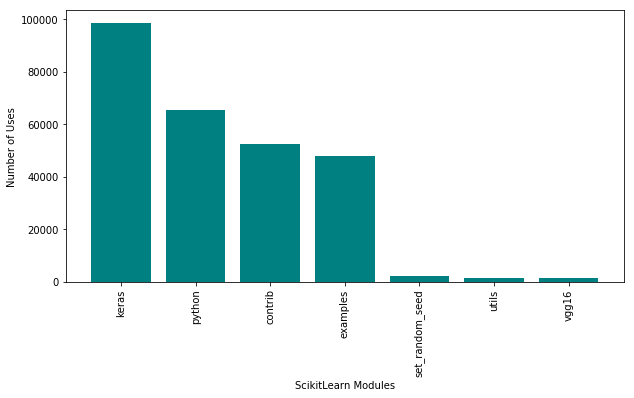

In [50]:
labels = tf_major_mods_counts.index[:20]
pos = np.arange(len(labels))
height = tf_major_mods_counts.values[:20]
fig = plt.figure(figsize=(10,5))
plt.bar(pos, height, color = 'teal')
plt.xticks(pos, labels, rotation = 90)
plt.xlabel('ScikitLearn Modules')
plt.ylabel('Number of Uses')
plt.show()

[Python Package Use &lt;](6_Packages.ipynb) | [&gt; ML Model Use](8_Models.ipynb)